# HW3: Classification

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load the modules.


We will work with two datasets
1. Sensors - This dataset classifies if a room is occupied or not based on sensor readings https://archive.ics.uci.edu/dataset/357/occupancy+detection
2. FMNIST - This dataset classifies 10 types of images of clothing https://github.com/zalandoresearch/fashion-mnist

In [1]:
import numpy as np # type: ignore # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Question 1 -- Room Occupancy

Suppose you're an engineer working on smart home devices, such as a thermostat that only turns on the heat when a room is occupied.

You need to know when a room is occupied so you devise the following system:
1. Each customer will purchase (from you) four sensors which they place around the room.
2. Each sensor is high quality and measures the ambient temperature, lighting, and sound level of the room with high precision
3. Based on these sensors readings you want to design a model that will predict if the room is occupied or not.

You test out these sensors and gather the following data
1. temp, light, and sound measurements from each sensor
2. whether the room is occupied or not




In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv'
occ = pd.read_csv(url).drop(['Date', 'Time', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'], axis = 1)
occ['occupied'] = 1.0*(occ['Room_Occupancy_Count'] != 0)
occ  = occ.drop(['Room_Occupancy_Count'], axis = 1).astype(int)
occ.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,occupied
0,24,24,24,25,121,34,53,40,0,0,0,0,1
1,24,24,24,25,121,33,53,40,0,0,0,0,1
2,25,24,24,25,121,34,53,40,0,0,0,0,1
3,25,24,24,25,121,34,53,40,0,0,0,0,1
4,25,24,24,25,121,34,54,40,0,0,0,0,1


# part 1.a

First split the data into a feature array `x` and label array `y`
- `x` should contain all sensor readings
- `y` should be only the occupied column

Second split the data into training and testing data with a test size of 33% using random state 42 to get the usual `x_train, x_test, y_train, y_test` datasets

In [4]:
# make x and y

# split intro train and test

# part 1.b

Train Logistic regression, LDA, and QDA classifiers.

1. Compute the Brier score and Log score for each method on the test dataset
2. Which model has better Brier score? Which has better log score?

In [5]:
# fit models

In [6]:
# predict probabilities

# predict labels

In [7]:
print('Brier score')
print('')

Brier score



In [8]:
print('Log score')
print('')

Log score



Which model is better? Enter text here.

# part 1.c

Compute the precision, recall, and F1 score of each method for each target category (1 and 0).

1. Summarize these metrics in tables (one for each model)
2. Which model has the highest average F1 score?

Which model is better? Enter text here.

# part 1.d

Now lets look at the tradeoff between sensitivity and specificty. Create a ROC curve for each model and display them in a single plot.

1. Which model has a higher AUC?
2. Are these models close to perfect?

In [9]:
# compute roc curves for each method. Store fpr, tpr, and thresholds

In [10]:
# plt each roc curve on the same figure
plt.figure(figsize = (9, 6))

plt.show()

<Figure size 900x600 with 0 Axes>

# part 1.e

Create a calibration curve for each model with at least 20 bins using quantile binning.

1. Plot and label the calibration curves. Include a line to represent perfect calibration.
2. Which model is the most calibrated?


In [11]:
# compute calibration curves for each model

In [12]:
# plot each calibration curve on the same figure
plt.figure(figsize = (10, 6))

plt.show()

<Figure size 1000x600 with 0 Axes>

# part 1.f

You find that the system works!


The only thing is these sensors are kind of expensive. Perhaps we can get similar performance with less sensors? That way the whole system will be cheaper and perhaps more people will buy it.

Test each sensor individually (using all three measurements) to see if you can build a classifier that is nearly as good as a classifier that uses all sensors.


1. Refit each model using only the data from a single sensor. For example if you want to use only sensor 1's data then only inlcude `['S1_Temp', 'S1_Light', 'S1_Sound']` as features. Save the Brier and log score for each model and each sensor. Print as a table so that I can tell what the brier and log score are for each model using each sensor.
1. Which sensor is best? Does it depend on the chosen model (Naive Bayes, LDA, QDA, vs Logistic Regression)?
2. How much does using the best sensor increase the Brier / log score and decrease the F1 score compared to using all sensors simultaneously?



In [13]:
# example using only sensor 1. You need to repeat for each sensor.
x = occ.loc[:, ['S1_Temp', 'S1_Light', 'S1_Sound']]
y = occ.loc[:,['occupied']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
# fit each model and save the brier and log scores


In [15]:
# Print out brier and log scores as a table for each model.
# Consider stuffing your results into a pandas dataframe and print that.
# make sure everything is labeled

# part 1.g

Regardless of your findings above, suppose sensor 1 is the only one available due to supply chain issues.

You wonder if all three measurements are even necessary. Using sensor 1, see if any of the measurements (Temp, Light, or Sound) can be dropped from the model without significantly deteriorating performance. Significant deterioration is defined as an increase in test Brier of 5%.


1. Can you achieve a Brier score (on test), using only 1 or 2 variables,  that is within 5% of the Brier score of the model using all 3?
2. Which variables are they?

In [16]:
# find the smallest set of features that can be retained. Example using only temperature and sound
x = occ.loc[:, ['S1_Temp', 'S1_Sound']]
y = occ.loc[:,['occupied']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
# Fit the models and compute the Brier scores

# part 1.h

Now were going even cheaper -- noisy instruments

Your boss says she knows this great factory that produces much cheaper sensors that are "just as good". You go on their website and find that that isnt quite true. It turns out

- They only make sensor 1
- They can't measure sound, but they can measure light and temp.
- They produce noisy readings.


Thankfully you can customize your order by how (cheap) noisy the sensor readings. Sensors that cost more have less noise. Sensors that cost less have more noise.

In the code below the `scale` variable determines how noisy (cheap) your sensor is. (Do not modify the rest of this code).

You want to order as cheaply as possible without compromising on quality, so you want to figure out how high you can set the `scale` value.

1. Increase the `scale` parameter until your test Brier score is just under 0.05 and precision of the positive class is still at least 0.98.
2. What is the highest `scale` value to the nearest 0.1 that achieves this?


In [18]:
# Use temp and light since they're available
x = np.array(occ.loc[:, ['S1_Temp', 'S1_Light']])

### noisy instruments (reduces signal strength by 4 and adds white noise)
np.random.seed(0)
scale = 0.0
x = x / 4 + np.random.normal(scale = scale, size = x.shape)

# occ['occupied'] = occ['Room_Occupancy_Count']
y = occ.loc[:,['occupied']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
# fit the models
# Compute Brier scores
# Compute precision

# Question 2. Classifying images

Now we work for a clothing company and we want to identify images of different kinds of shoes. Specifically, given an image of either "Sandals", "Sneakers", and "Ankle Boots" we want to label the image correctly.

We go down to the IT department and ask the IT guy for some data. He grumbles and briefly pauses _Hunter x Hunter_ to send us "some data". It turns out he sent us a lot more than we asked for. We receive a dataset of 60000 images containing "Sandals", "Sneakers", and "Ankle Boots" but also 7 other kinds of images.

Use the following code to download the data. If you are on google colab you will not need to install any new packages and you can just run the code. If you are not on google colab then install the following packages with

`pip3 install torch torchvision torchaudio`

and then run the code.

In [20]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

from tqdm.notebook import tqdm
from tqdm.notebook import trange

In [21]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# part 2.a

After brief inspection we find that the Fashion MNIST dataset contains 9 classes

Label Map

0 : "T-Shirt"

1: "Trouser"

2: "Pullover"

3: "Dress"

4: "Coat"

5: "Sandal"

6: "Shirt"

7: "Sneaker"

8: "Bag"

9: "Ankle Boot"


First we need to extract out only the relevant items from the dataset. Namely those observations that correspond to "Sandals", "Sneakers", and "Ankle Boots" or observations where the label is 5, 7, or 9

You can extract the image and label from the training_data object with `training_data[idx]` which will extract the image and label from the training dataset that corresponds to observation `idx`.

See the example below that extracts observation 0

In [22]:
idx = 0
img, label = training_data[idx]

1. Write a loop (or however you want) to pull out all observations with a 5, 7, or 9 label. Store the extracted image in `shoes` and the extracted labels in `labels`. There are 6000 images per class in this dataset.

In [33]:
shoes = np.zeros((3 * 6000, 28*28))
labels = np.zeros(3 * 6000)


for i in trange(len(training_data)):
  img, label = training_data[i]
  img = img.flatten() # flattens the image into a vector
  # store these only if label in [5, 7, 9]
  if label in [5, 7, 9]:
    idx = np.sum(labels != 0)  # find the next available index
    shoes[idx] = img.numpy()
    labels[idx] = label

  0%|          | 0/60000 [00:00<?, ?it/s]

2. Plot one observation from each class. Label the image with the name of the class. Note that the stored shoe images, e.x. `shoe[0]` is a vector and needs to be reshaped into a 28 x 28 pixel image. Use `imshow`

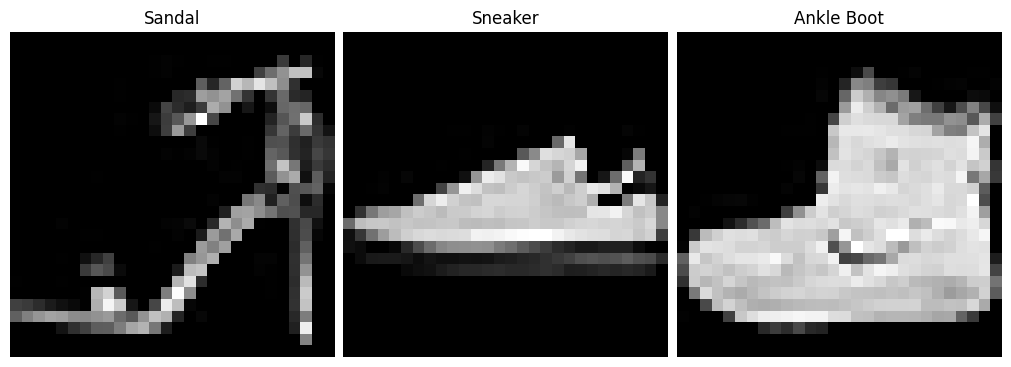

In [ ]:
fig, ax = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 4))

### print one image per ax. Example provided. Dont forget to reshape!
class_names = {5: "Sandal", 7: "Sneaker", 9: "Ankle Boot"}
for i, class_label in enumerate([5, 7, 9]):
    idx = np.where(labels == class_label)[0][0]
    ax[i].imshow(shoes[idx].reshape(28, 28), cmap='gray')
    ax[i].set_title(class_names[class_label])
    ax[i].axis('off')

In [25]:
### Example plot. Do not run.

# part 2.b

Your boss doesnt want to pay for the computing necessary for deep learning so were going to fit some classical models and hope for the best.

1. Split the data with a test_size = 0.33 and random_state 42 using the `train_test_split()` function.

2. Fit LDA, QDA, and Logistic Regression to the training data.

In [ ]:
x = shoes
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)

# fit models
lda = LDA()
qda = QDA()
log_reg = LogisticRegression(max_iter=1000)

lda.fit(x_train, y_train)
qda.fit(x_train, y_train)
log_reg.fit(x_train, y_train)



LogisticRegression(max_iter=1000)

3. Print the training error and test error (Brier and Log).
4. Which model has the lowest train? Lowest test? Lowest difference between train and test?

In [43]:
# predict probabilities
lda_probs = lda.predict_proba(x_test)
qda_probs = qda.predict_proba(x_test)
log_probs = log_reg.predict_proba(x_test)

# print 
print('Brier score')
print('LDA:', brier_score(y_test, lda_probs))
print('QDA:', brier_score(y_test, qda_probs))
print('Logistic Regression:', brier_score(y_test, log_probs))

print('Log score')
print('LDA:', log_score(y_test, lda_probs))
print('QDA:', log_score(y_test, qda_probs))
print('Logistic Regression:', log_score(y_test, log_probs))


Brier score
LDA: 0.1219935373020505
QDA: 0.7382292316260073
Logistic Regression: 0.09555184531390712
Log score
LDA: 0.40021458325385756
QDA: 26.995186743197987
Logistic Regression: 0.18015236229224893


```markdown
4. Which model has the lowest train? Lowest test? Lowest difference between train and test?

- **Lowest Train Error**: Logistic Regression
- **Lowest Test Error**: Logistic Regression
- **Lowest Difference between Train and Test Error**: Logistic Regression

Logistic Regression performs the best overall in terms of both training and testing errors, as well as having the smallest difference between the two, indicating good generalization.
```

# part 2.c

1. Print the classification report for each method.
2. Which method is best in terms of F1 score?

In [29]:
# predict labels for each model

In [45]:
from sklearn.metrics import classification_report

# print classification report. Which is best in terms of F1?
# predict labels for each model
lda_pred = lda.predict(x_test)
qda_pred = qda.predict(x_test)
log_pred = log_reg.predict(x_test)

# print classification reports
print("LDA Classification Report:")
print(classification_report(y_test, lda_pred, target_names=["Sandal", "Sneaker", "Ankle Boot"]))

print("QDA Classification Report:")
print(classification_report(y_test, qda_pred, target_names=["Sandal", "Sneaker", "Ankle Boot"]))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_pred, target_names=["Sandal", "Sneaker", "Ankle Boot"]))

# Determine which method is best in terms of F1 score
lda_report = classification_report(y_test, lda_pred, target_names=["Sandal", "Sneaker", "Ankle Boot"], output_dict=True)
qda_report = classification_report(y_test, qda_pred, target_names=["Sandal", "Sneaker", "Ankle Boot"], output_dict=True)
log_report = classification_report(y_test, log_pred, target_names=["Sandal", "Sneaker", "Ankle Boot"], output_dict=True)

lda_f1 = lda_report['weighted avg']['f1-score']
qda_f1 = qda_report['weighted avg']['f1-score']
log_f1 = log_report['weighted avg']['f1-score']

best_model = max((lda_f1, 'LDA'), (qda_f1, 'QDA'), (log_f1, 'Logistic Regression'))

print(f"Best model in terms of F1 score: {best_model[1]} with F1 score of {best_model[0]:.4f}")

LDA Classification Report:
              precision    recall  f1-score   support

      Sandal       0.95      0.92      0.93      2001
     Sneaker       0.89      0.93      0.91      1994
  Ankle Boot       0.94      0.94      0.94      1945

    accuracy                           0.93      5940
   macro avg       0.93      0.93      0.93      5940
weighted avg       0.93      0.93      0.93      5940

QDA Classification Report:
              precision    recall  f1-score   support

      Sandal       0.90      0.21      0.35      2001
     Sneaker       0.52      0.97      0.68      1994
  Ankle Boot       0.79      0.72      0.75      1945

    accuracy                           0.63      5940
   macro avg       0.74      0.63      0.59      5940
weighted avg       0.74      0.63      0.59      5940

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Sandal       0.94      0.93      0.94      2001
     Sneaker       0.92      0.9

# part 2.d

Compute and print the accuracy of each method. Which method has the highest accuracy?

In [47]:
print('Accuracy')
print('LDA:', lda.score(x_test, y_test))
print('QDA:', qda.score(x_test, y_test))
print('Logistic Regression:', log_reg.score(x_test, y_test))
print('')

Accuracy
LDA: 0.9271043771043771
QDA: 0.6308080808080808
Logistic Regression: 0.9331649831649832



```markdown
Logistic Regression has the highest accuracy.
```

# part 2.e

The above results are dependent on the the specific seed we set in the train test split function.

How do we know the best model would still be the best if the data was split differently? Let's resplit the data a few times and determine which model is best on average.

1. Refit your models using 20 different seed values in the `train_test_split` function. Use seed values 0 to 19.
2. Recompute the test set brier score and accuracy for each seed.
3. Print out the average Brier score and accuracy and the standard deviation of each metric.
4. Is the best model always better than the others? Which model is best on average?


In [48]:
seeds = np.arange(20)
brier_scores = {'LDA': [], 'QDA': [], 'Logistic Regression': []}
accuracies = {'LDA': [], 'QDA': [], 'Logistic Regression': []}

for seed in seeds:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=seed)
    
    lda.fit(x_train, y_train)
    qda.fit(x_train, y_train)
    log_reg.fit(x_train, y_train)
    
    lda_probs = lda.predict_proba(x_test)
    qda_probs = qda.predict_proba(x_test)
    log_probs = log_reg.predict_proba(x_test)
    
    brier_scores['LDA'].append(brier_score(y_test, lda_probs))
    brier_scores['QDA'].append(brier_score(y_test, qda_probs))
    brier_scores['Logistic Regression'].append(brier_score(y_test, log_probs))
    
    accuracies['LDA'].append(lda.score(x_test, y_test))
    accuracies['QDA'].append(qda.score(x_test, y_test))
    accuracies['Logistic Regression'].append(log_reg.score(x_test, y_test))

print('Average Brier Scores:')
for model in brier_scores:
    print(f'{model}: {np.mean(brier_scores[model]):.4f} ± {np.std(brier_scores[model]):.4f}')

print('\nAverage Accuracies:')
for model in accuracies:
    print(f'{model}: {np.mean(accuracies[model]):.4f} ± {np.std(accuracies[model]):.4f}')

Average Brier Scores:
LDA: 0.1203 ± 0.0053
QDA: 0.7551 ± 0.0198
Logistic Regression: 0.0943 ± 0.0038

Average Accuracies:
LDA: 0.9272 ± 0.0031
QDA: 0.6223 ± 0.0098
Logistic Regression: 0.9381 ± 0.0028


# part 2.f

Based on everything you have seen in parts a-e. Which model would you choose and why? Explain using at least 3 sentences and using the metrics you saw above.

Enter thoughts here.